# Data Analyst Nanodegree
## Project: Wrangle and Analyze Data
### Laila Hussain Alqawain

-------------------------------------

# Introduction
In this project, I will wrangle the dataset from WeRateDogs twitter account which about dogs. I used the files that Udacity provided 'twitter_archive_enhanced.csv', 'tweet-json.txt' and 'image-predictions.tsv'.

# Gathering Data
* **'twitter_archive_enhanced.csv':** I download this file manually and upload to jupyter notebook. I make to **'twitter_archive_clean'**.
* **'tweet_json.text':** I download the file and upload to jupyter notebook. I read it and created a dataframe contained 'tweet_id', 'retweet_count' and 'favorite_count'. I make a copy of orginal dataset to **'tweet_df_clean'**.
* **'image-predictions.tsv':** I download the file and upload to jupyter notebook. I read the file and make a copy to **'image_prediction_clean'** dataframe.

In [1]:
import pandas as pd 
import numpy as np
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
# Read in csv file as a Pandas DataFrame
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Copy twitter_archive_enhanced to twitter_archive_clean
twitter_archive_clean = twitter_archive_enhanced.copy()

In [5]:
# Read JSON data then save it to dataframe
tweet_list = []
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Add dictionaries to tweet_list
        tweet_list.append({'tweet_id': status['id'],
                          'retweet_count': status['retweet_count'],
                          'favorite_count': status['favorite_count'],
                          })
        
# Create a dataframe contains 'tweet_id', 'retweet_count' and 'favorite_count'
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [6]:
# Copy the orginal dataframe to 'tweet_df_clean' dataframe
# I will work on 'df_clean' 
tweet_df_clean = tweet_df.copy()

In [7]:
# Import the image predictions by using requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read 'image-predictions.tsv' file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8' )

In [8]:
# Copy the orginal dataframe of 'image_predictions' to 'image_predictions_clean' dataframe
# I will work on 'image_predictions_clean' 
image_prediction_clean = image_prediction.copy()

# Assessing Data
### Two types of assessment I will use:

**1- Visual assessment:** I will use '.to_csv' to save datasets and display in Excle. Because there are lots of rows I coulden't see in Jupyter Notebook.

In [9]:
# Display the twitter_archive table
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


As we see above, there are 17 columns and 2356 rows. There are some columns looks like as empty. Also, we could see most of the rows because were hidden. So, I will save it as CSV file to display in Excel.

In [10]:
# Display the tweet table
tweet_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


As we see above, there are three columns and 2354 rows. 
* **tweet_id:** is the unique identifier for each tweet.
* **retweet_count:** is number of times this tweet has been retweeted.
* **favorite_count:** is number of likes.

Also, we could see most of the rows because were hidden. So, I will save it as CSV file to display in Excel.

In [11]:
tweet_df_clean.to_csv('tweet_df_clean.csv')

In [12]:
# Display the image table
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


As we see above, there are 12 columns and 2075 rows.
* **tweet_id:** is the unique identifier for each tweet.
* **jpg_URL:** is where the image is hosted
* **img_num:** is image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
* **p1:** is the algorithm's #1 prediction for the image in the tweet → golden retriever
* **p1_conf:** is how confident the algorithm is in its #1 prediction → 95%
* **p1_dog:** is whether or not the #1 prediction is a breed of dog → TRUE
* **p2:** is the algorithm's second most likely prediction → Labrador retriever
* **p2_conf:** is how confident the algorithm is in its #2 prediction → 1%
* **p2_dog:** is whether or not the #2 prediction is a breed of dog → TRUE etc.

Also, we could see most of the rows because were hidden. So, I will save it as CSV file to display in Excel.

In [13]:
# Save image_prediction_clean to image_prediction_clean.csv
image_prediction_clean.to_csv('image_prediction_clean.csv')

**2- Programmatic assessment:** I will use some of pandas' functions and/or methods to assess the data.

In [14]:
# View first 5 rows of twitter_archive_clean DataFrame
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# View last 5 rows of twitter_archive_clean DataFrame
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# View sample of twitter_archive_clean DataFrame
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,None,None,None,None,None


In [18]:
# View 5 numbers summary of twitter_archive_clean DataFrame
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# View any duplicated in twitter_archive_clean
twitter_archive_clean.duplicated().sum()

0

In [20]:
# View count of null values in twitter_archive_clean
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# View value count of name in twitter_archive_clean
twitter_archive_clean.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Toby           7
an             7
Buddy          7
Daisy          7
Oscar          6
Scout          6
Koda           6
Jax            6
Leo            6
Dave           6
Rusty          6
Bella          6
Jack           6
Stanley        6
Milo           6
Sunny          5
            ... 
Ember          1
General        1
Reptar         1
Hermione       1
Rueben         1
Stella         1
Jed            1
Godi           1
Tanner         1
Marlee         1
Tupawc         1
Wiggles        1
Reagan         1
Comet          1
Grizzie        1
Devón          1
Rhino          1
Keet           1
Lucia          1
Ralphy         1
Raphael        1
Chaz           1
Joey           1
Traviss        1
Alejandro      1
Crumpet        1
Toffee         1
Orion         

In [22]:
# View value count of rating_numerator
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
# View first 5 rows of tweet_df_clean DataFrame
tweet_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
# View last 5 rows of tweet_df_clean DataFrame
tweet_df_clean.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [25]:
# View info of tweet_df_clean DataFrame
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
# View sample of tweet_df_clean DataFrame
tweet_df_clean.sample()

,tweet_id,retweet_count,favorite_count
1173,720043174954147842,2253,5332


In [27]:
# View 5 numbers summary of tweet_df_clean DataFrame
tweet_df_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
# View any null value in tweet_df_clean DataFrame
tweet_df_clean.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [29]:
# View any duplicated in tweet_df_clean DataFrame
tweet_df_clean.duplicated().sum()

0

In [30]:
# View value count of favorite_count
tweet_df_clean.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [31]:
# View value count of retweet_count
tweet_df_clean.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [32]:
# View first 5 rows of image_prediction_clean DataFrame
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
# View last 5 rows of image_prediction_clean DataFrame
image_prediction_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
# View info of image_prediction_clean DataFrame
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# View sample of image_prediction_clean DataFrame
image_prediction_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.42425,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.02847,True


In [36]:
# View 5 numbers summary of image_prediction_clean DataFrame
image_prediction_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
# View any null value in image_prediction_clean DataFrame
image_prediction_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
# View any duplicated value
image_prediction_clean.duplicated().sum()

0

In [39]:
# View value count of img_num
image_prediction_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [40]:
# View value count of p1
image_prediction_clean.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [41]:
# View value count of p2
image_prediction_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [42]:
# View value count of p3
image_prediction_clean.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

After assessing data, I can see many issues, let's display some of them
### Quality 

**1-** Missing value in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.<br>
**2-** Inaccurate datatype for tweet_id, timestamp, and dog_stage columns.<br>
**3-** Tweets without images.<br>
**4-** Text of the source column is unreadable.<br>
**5-** Inaccurate names of name column.<br>
**6-** Uppercase given in p1, p2, and p3 columns.<br>
**7-** Unneeded columns for analyst (rating_numerator, rating_denominator, img_num, p1_dog, p1_conf, p2_dog, p2_conf, p3_dog, p3_conf, and jpg_url).<br>
**8-** Text column contains links.<br>

### Tidiness
**1-** Dog stage variable in 4 columns (doggo, floofer, pupper, and puppo).<br>
**2-** Join 'tweet_df_clean' and 'image_prediction_clean' with 'twitter_archive_clean' by 'tweet_id'.<br>
**3-** Rating variable in 2 columns(rating_numerator and rating_denominator).

# Cleaning Data
Let's start with **Tidiness** issuses first. 

### Define
1- Create dog stage variable instead of 4 columns and remove these columns(doggo, floofer, pupper, and puppo).

### Code

In [43]:
# Create variabel of None value
none_value = ['None']

# Loop to replace any None value with null value.
for words in none_value:
    twitter_archive_clean.loc[twitter_archive_clean.floofer == words, 'floofer'] = None
    twitter_archive_clean.loc[twitter_archive_clean.puppo == words, 'puppo'] = None
    twitter_archive_clean.loc[twitter_archive_clean.pupper == words, 'pupper'] = None
    twitter_archive_clean.loc[twitter_archive_clean.doggo == words, 'doggo'] = None

In [44]:
# Create 'dog_stage' variable by merge values of pupper, puppo, floofer, and doggo columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean[twitter_archive_clean.columns[13:17]].apply(
    lambda x:','.join(x.dropna().astype(str).astype(str)),
    axis=1)

In [45]:
# Create variable of columns and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

### Test

In [81]:
# View first 5 rows of twitter_archive_clean DataFrame
twitter_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,p1,p2,p3,rating
1842,675870721063669760,2015-12-13 02:51:51,Twitter for iPhone,&amp; this is Yoshi. Another world record cont...,https://twitter.com/dog_rates/status/675870721...,None,,632.0,1783.0,golden_retriever,welsh_springer_spaniel,beagle,1.1
437,820078625395449857,2017-01-14 01:22:35,Twitter for iPhone,I've never wanted to go to a camp more in my e...,https://twitter.com/dog_rates/status/820078625...,None,,7246.0,21979.0,school_bus,cab,crane,1.2


In [82]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


In [83]:
twitter_archive_clean.dog_stage.value_counts()

                 1923
pupper            243
doggo              80
puppo              28
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [84]:
# View dog_stage of of exact row
twitter_archive_clean['dog_stage'][200]

'doggo,floofer'

### Define
2- Join 'tweet_df_clean' and 'image_prediction_clean' with 'twitter_archive_clean' by 'tweet_id'.

### Code

In [50]:
# Merge tweet_df_clean with twitter_archive_clean DataFrame
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_df_clean, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [51]:
# Merge image_prediction_clean with twitter_archive_clean DataFrame
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right= image_prediction_clean, left_on='tweet_id', right_on='tweet_id', how = 'left')

### Test

In [85]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
3- Create rating column that contains the result of the rating_numerator dividing on rating_denominator.

### Code

In [53]:
# Create rating column which is made by rating_numerator dividing on rating_denominator.
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'] 

### Test

In [86]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


In [87]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,p1,p2,p3,rating
2039,671547767500775424,2015-12-01 04:33:59,Twitter for iPhone,This is Marley. She chews shoes then feels ext...,https://twitter.com/dog_rates/status/671547767...,Marley,,658.0,1444.0,loafer,platypus,cowboy_boot,1.0
1854,675534494439489536,2015-12-12 04:35:48,Twitter for iPhone,Seriously guys?! Only send in dogs. I only rat...,https://twitter.com/dog_rates/status/675534494...,None,,470.0,1953.0,chow,schipperke,newfoundland,1.1
439,819952236453363712,2017-01-13 17:00:21,Twitter for iPhone,This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",Oliver,puppo,1369.0,5927.0,american_staffordshire_terrier,staffordshire_bullterrier,italian_greyhound,1.3


Second, **Quality** issuses.

### Define
1- Drop columns with the most null values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).

### Code

In [56]:
# Create columns variable and drop columns from twitter_archive_clean DataFrame
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

### Test

In [88]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
2- Change datatypes of tweet_id to string, timestamp to datatime and dog_stage to category.

### Code

In [58]:
# Change datatypes of tweet_id, dog_stage and timestamp
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### Test

In [89]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
3- Remove rows without images (expaned_urls).

### Code

In [60]:
# Check how many rows with null value in expanded_urls column
twitter_archive_clean.expanded_urls.isnull().sum()

59

In [61]:
# Drop rows without images
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

### Test

In [90]:
# Confirm that there is no null value in expanded_urls column
# Result should be False.
twitter_archive_clean.expanded_urls.isnull().sum().any()

False

In [91]:
# Confirm that there is no null value in expanded_urls column
# Result should be 0
twitter_archive_clean.expanded_urls.isnull().sum()

0

### Define
4- Change the text of the source column to more readable categories.

### Code

In [64]:
# View old value count of source column
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2163
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [65]:
# Remove url from sources
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [66]:
# Change datatype of sources to category
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test

In [92]:
# View new value counts of source column
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2163
Vine                    91
Twitter Web Client      32
TweetDeck               11
Name: source, dtype: int64

In [93]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
5- Replace inaccurate names in name column with NaN value.

### Code

In [69]:
# Create variabel of inaccurate names
wrong_name = ['None', 'a', 'by','old','his','the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my','officially', 'getting', 'incredibly', 'infuriating']

# Loop to replace any wrong name with null value.
for words in wrong_name:
    twitter_archive_clean.loc[twitter_archive_clean.name == words, 'name'] = None

### Test

In [94]:
# View value count of name column
twitter_archive_clean.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
1616           Alfie
2238           Alfie
661            Alfie
858            Alfie
367            Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
2326            None
2327            None
2328            None
2329            None
2330            None
2331            None
2332            None
2333            None
2334            None
2335            None
2336            None
2337            None
2338            None
2339            None
2340            None
2341            None
2342         

In [95]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
6- Replace the first uppercase letter with lowercase of p1, p2, and p3 columns.

### Code

In [72]:
# Change first uppercase letter with lowercase of p1, p2, and p3 columns.
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.lower()
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.lower()
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.lower()

### Test

In [96]:
# View sample of p1 column
twitter_archive_clean.p1.sample(5)

1422    chesapeake_bay_retriever
1710                         tub
1028                    pekinese
1566                         NaN
1269              cocker_spaniel
Name: p1, dtype: object

In [97]:
# View sample of p2 column
twitter_archive_clean.p2.sample(5)

771            miniature_poodle
1563                 horse_cart
1046            standard_poodle
88                          NaN
2045    black-and-tan_coonhound
Name: p2, dtype: object

In [98]:
# View sample of p3 column
twitter_archive_clean.p3.sample(5)

855            entlebucher
1601              whiptail
1458                 lhasa
1149    labrador_retriever
2172                kuvasz
Name: p3, dtype: object

### Define
7- Drop unneeded columns (rating_numerator, rating_denominator, img_num, p1_dog, p1_conf, p2_dog, p2_conf, p3_dog, p3_conf, and jpg_url).

### Code

In [76]:
# Create columns variable and drop columns from twitter_archive_clean DataFrame
columns = ['rating_numerator', 'rating_denominator', 'img_num', 'p1_dog', 'p1_conf', 'p2_dog', 'p2_conf', 'p3_dog', 'p3_conf', 'jpg_url']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

### Test

In [99]:
# View info of twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 300.4+ KB


### Define
8- Remove links from text column.

### Code

In [78]:
# Create a regex pattern in order to define the URLs 
# that are present in the text column
pattern = r"http\S+"

In [79]:
# Loop to remove all URLs from line texts
clean_text = []

for line in twitter_archive_clean['text']:
    clean_text.append(re.sub(pattern, "", line))
    
twitter_archive_clean['text'] = clean_text

### Test

In [100]:
# Check text variabel and select a random row
twitter_archive_clean['text'][1000]

'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts '

# Storing, Analyzing, and Visualizing Data

In [101]:
# Save twitter_archive_clean DataFrame to twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [102]:
# Create a copy of twitter_archive_clean to df to using in analyzing
df = twitter_archive_clean.copy()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id          2297 non-null object
timestamp         2297 non-null datetime64[ns]
source            2297 non-null category
text              2297 non-null object
expanded_urls     2297 non-null object
name              1509 non-null object
dog_stage         2297 non-null category
retweet_count     2295 non-null float64
favorite_count    2295 non-null float64
p1                2075 non-null object
p2                2075 non-null object
p3                2075 non-null object
rating            2297 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 220.4+ KB


### Insight #1
#### What is the most partition of the dog stages?

In [104]:
# View value count of dog stage
df.dog_stage.value_counts()

                 1923
pupper            243
doggo              80
puppo              28
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [105]:
# Create df_dog dataframe contains copy of dog_stage column
# that I will use it to create specific plot without null value
df_dog = df['dog_stage'].copy()

In [106]:
# Create a df_stage variable 
df_stage = df_dog[(df_dog == "pupper") | (df_dog == "doggo") | (df_dog == "puppo")|(df_dog == "doggo,pupper")|(df_dog == "floofer")
       |(df_dog == "doggo,floofer")|(df_dog == "doggo,puppo")]

In [109]:
# Change datatype of df_stage to string
# that is for making an accurate plot
df_stage = df_stage.astype('str')

# View value count of df_dog_stage_clean
df_stage.value_counts()

pupper           243
doggo             80
puppo             28
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

(0.0, 255.15000000000001)

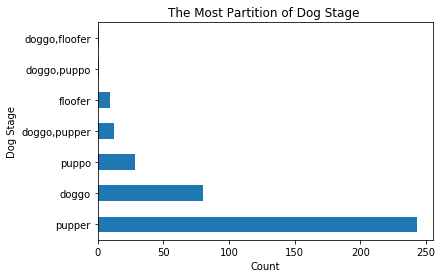

In [110]:
df_stage.value_counts().plot(kind = 'barh')
plt.title('The Most Partition of Dog Stage ')
plt.xlabel('Count')
plt.ylabel('Dog Stage')
plt.xlim()

From the bar plot above, the most stage of dog is **pupper** with 243 tweets.

### Visualization

In [171]:
# View number of columns and rows in our df
df.shape

(2297, 13)

In [111]:
# View number of columns and rows in our df
df_stage.value_counts().sum()

374

As we see above, there are 2297 tweets and just 374 of them had dog stage value. So, I think that is the pupper stage maybe is not the most partition of dog stage due to the most of dog_stage value are null values with 1923 tweets.

### Insight #2
#### What is the most source of tweets?

In [112]:
df['source'].value_counts()

Twitter for iPhone    2163
Vine                    91
Twitter Web Client      32
TweetDeck               11
Name: source, dtype: int64

Text(0,0.5,'Source')

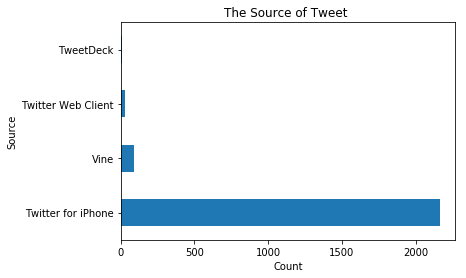

In [113]:
# Create bar plot for tweet source.
df['source'].value_counts().plot(kind = 'barh')
plt.title('The Source of Tweet ')
plt.xlabel('Count')
plt.ylabel('Source')

From the bar plot above, the most of tweets comes from **Twitter for iPhone** with 2163 tweets.

### Visualization
I can say that most people use a smart phone, take photo, share their life through social media application by the most popular smartphone which is iPhone.

### Insight #3
#### What is the most rating has the most likes?

Text(0,0.5,'Favorite Count')

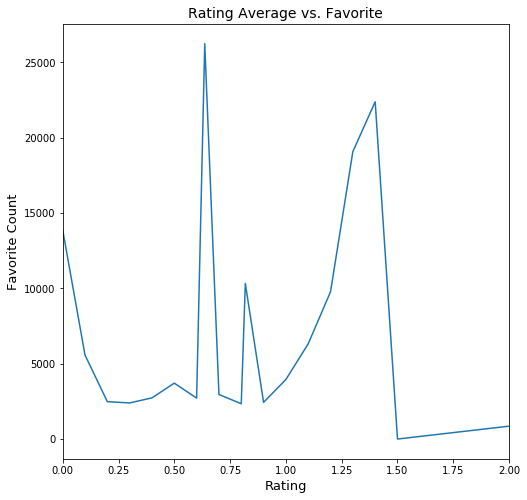

In [114]:
df.groupby('rating').mean()['favorite_count'].plot(figsize = (8,8))
plt.xlim(0, 2)
#setup the figure
plt.title("Rating Average vs. Favorite",fontsize = 14)
plt.xlabel('Rating',fontsize = 13)
plt.ylabel('Favorite Count',fontsize = 13)

From the line plot above, there is one peak the rating is between 0.50 and 0.75 and the number of likes is over 25000 likes. So, the dogs which had rating under 1 had the most likes.

### Visualization

In [115]:
# View value count of rating
df.rating.value_counts()

1.200000      551
1.100000      461
1.000000      457
1.300000      339
0.900000      155
0.800000      102
0.700000       52
1.400000       50
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        5
0.818182        2
7.500000        2
0.000000        2
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
1.500000        1
2.700000        1
Name: rating, dtype: int64

In [116]:
# View 5 numbers summary of df
df.describe()

,retweet_count,favorite_count,rating
count,2295.000000,2295.000000,2297.000000
mean,3239.544227,8243.511111,1.171964
std,5331.105886,11917.300457,3.791936
min,16.000000,0.000000,0.000000
25%,666.000000,1494.500000,1.000000
50%,1529.000000,3707.000000,1.100000
75%,3727.000000,10399.000000,1.200000
max,79515.000000,132810.000000,177.600000


In [117]:
# View row with  132810 likes
df[(df.favorite_count == 132810)]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,p1,p2,p3,rating
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,None,puppo,48265.0,132810.0,lakeland_terrier,labrador_retriever,irish_terrier,1.3


In [120]:
df['dog_stage'][413]

'puppo'

I can see there are outlires values in the rating column. Even thoghth, the dog which had the most likes is puppo dog with the rating is 1.3.

### Insight #4
#### What is the relationship between retweet and likes?

Text(0,0.5,'Likes')

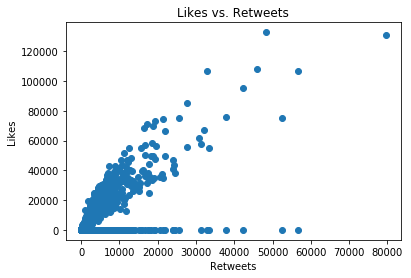

In [121]:
#create scatter plot between retweets and favorites
plt.scatter(df['retweet_count'], df['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

From the scatter plot, there is a weak positive relationship between reweet and likes. Also, there are outlires.

### Visualization

In [122]:
# View 5 numbers summary of df
df.describe()

,retweet_count,favorite_count,rating
count,2295.000000,2295.000000,2297.000000
mean,3239.544227,8243.511111,1.171964
std,5331.105886,11917.300457,3.791936
min,16.000000,0.000000,0.000000
25%,666.000000,1494.500000,1.000000
50%,1529.000000,3707.000000,1.100000
75%,3727.000000,10399.000000,1.200000
max,79515.000000,132810.000000,177.600000


In [123]:
# View rows with max value of rating and likes
df[(df.favorite_count == 132810) | (df.retweet_count == 79515)]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,p1,p2,p3,rating
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,None,puppo,48265.0,132810.0,lakeland_terrier,labrador_retriever,irish_terrier,1.3
1039,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,79515.0,131075.0,labrador_retriever,ice_bear,whippet,1.3


The dog stage which had the most likes is puppo dog with the rating is 1.3. Also, the most tweet of a dog with the highest retweet the rating is 1.3, but the dog stage is doggo.

------------------------

## Resources
* https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

* https://www.w3schools.com/python/python_file_open.asp

* https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/

* https://stackoverflow.com/questions/24848925/how-to-install-tweepy-with-anacondas-and-easy-install

* https://stackoverflow.com/questions/45899613/divide-certain-columns-by-another-column-in-pandas

* https://stackoverflow.com/questions/35439613/python-pandas-dividing-column-by-another-column

* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

* https://stackoverflow.com/questions/29337123/how-to-change-the-range-of-the-x-axis-and-y-axis-in-matlibplot

* https://stackoverflow.com/questions/40699778/query-a-data-frame-by-multiple-columns

* https://www.youtube.com/watch?v=YPItfQ87qjM

* https://www.youtube.com/watch?v=xvpNA7bC8cs

In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0